# In Class Assignment 2 - ME 364 (Spring 2022)

<font color=red>__Question (1)__</font>: Develop a simple linear regression model using independant variable, "elongation", and the target variable, "tensile strength". Follow the steps in the notebook we used in class to develop your model, report the coefficients, and make predictions on test data.

Import 3D printing database and print first few lines

In [66]:
import pandas as pd

url = 'https://raw.githubusercontent.com/MasoudMiM/ME_364/main/3D_Printer_Data/3DPrinterDataset.csv'
df = pd.read_csv(url)

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


Plot the tensile strength (target) with respect to the elongation (IV)

<AxesSubplot:xlabel='elongation', ylabel='tension_strenght'>

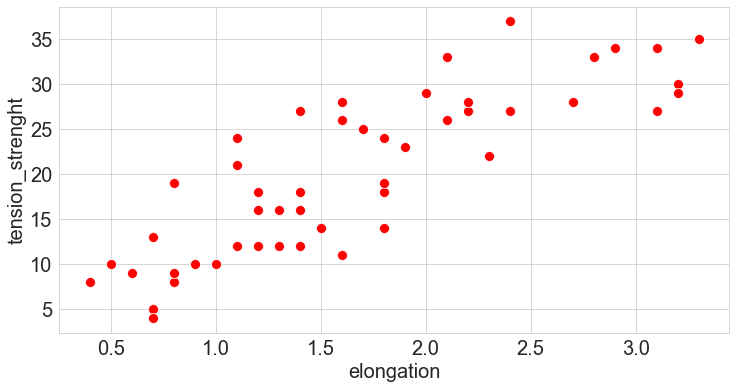

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',size=20)
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='elongation', y='tension_strenght', 
                s=100, color='r')

Develop simple linear regression model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Define x and y data
x_datal=np.array(df[['elongation']])
y_datal=np.array(df[['tension_strenght']])

# Split into training and testing sets
x_trainl,x_testl,y_trainl,y_testl=train_test_split(
    x_datal,y_datal, test_size=0.2, shuffle=True, random_state=100)

# Define the instance of linear regression
lml = LinearRegression()

# Fitting the model to the training data
lml.fit(x_trainl,y_trainl)

# reporting the values of weights
w0l=lml.intercept_[0]  # w_0
w1l=lml.coef_[0][0]    # W-1
print(f'w_0={w0l:.3f} and w_1={w1l:.3f}')

# making prediction
yhatl = lml.predict(x_testl)

w_0=3.340 and w_1=9.778


<font color=red>__Question (2)__</font>: Using the model you developed for Question (1), perform a model evaluation using MSE, MAE, and R$^2$. Also, plot your training data, test data, and the fitted line on the same plot with legends and axes labels. 

In [69]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(y_testl, yhatl)
print(f'The value of mean squared error is: {MSE:.2f}')

The value of mean squared error is: 27.00


In [70]:
# R2 score
from sklearn.metrics import r2_score

r2score = r2_score(y_testl, yhatl)
print(f'The value of R2 is: {r2score:.2f}')

The value of R2 is: 0.52


In [71]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE=mean_absolute_error(y_testl,yhatl)
print(f'The value of mean absolute error is: {MAE:.2f}')

The value of mean absolute error is: 4.14


We can also visually inspect the fit line and see how much it represents our data points.

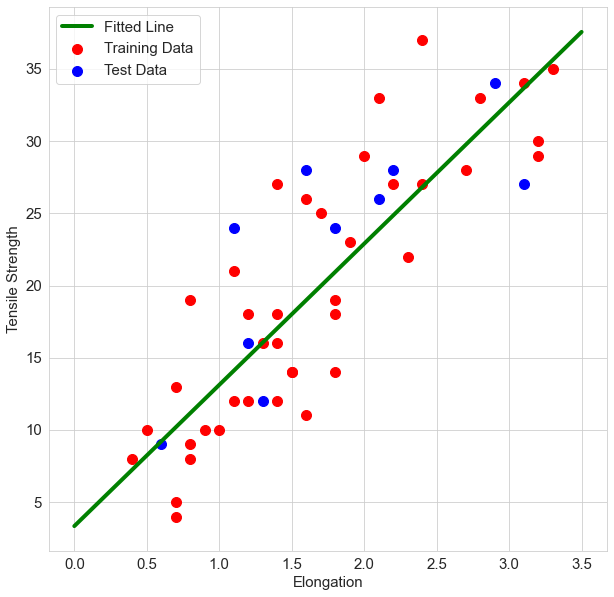

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.rc('font',size=15)

# Plotting the training data
plt.scatter(x_trainl, y_trainl,s=100,color='red',label='Training Data')

# Plotting the test data
plt.scatter(x_testl, y_testl,s=100,color='blue', label='Test Data')

# Plotting the fitted line
xplot=np.linspace(0,3.5,num=100)
yplot=w0l+w1l*xplot
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')

# Labling and putting legend
plt.xlabel('Elongation')
plt.ylabel('Tensile Strength')
plt.grid(True)
plt.legend(loc='best')

<font color='red'>__Question (3)__</font>: Follow the steps described in the notebook and develop a linear model using independent variables "elongation" and "roughness", and dependent variable "tensile strength". Find and report the coefficients (weights) and also make predictions using the test data.

In [73]:
# importing required functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# defining the I.V. and Target Variable (D.V.)
x_datam=np.array(df[['elongation','roughness']])
y_datam=np.array(df[['tension_strenght']])

# Splitting the data into train and test 80/20
x_trainm, x_testm, y_trainm, y_testm=train_test_split(x_datam, y_datam, test_size=0.2, shuffle=True, random_state=10)

# Define the linear regression object
lmm = LinearRegression()

# Fitting the model to the training data
lmm.fit(x_trainm, y_trainm)

# reporting the values of weights
w0m=lmm.intercept_[0]  # w_0
w1m=lmm.coef_[0,0]     # w_1
w2m=lmm.coef_[0,1]     # w_2
print(f'w_0={w0m:0.2f}, w_1= {w1m:.2f} and w2={w2m:.2f}')

# making prediction
yhatm = lmm.predict(x_testm)

w_0=5.18, w_1= 10.14 and w2=-0.01


<font color=red>__Question (4)__</font>: Using the model you developed for Question (3), perform a model evaluation using MSE, MAE, and R$^2$ and print the metrics. Which model has the better performance? Simple linear regression you developed in Q(1)-Q(2) or multiple linear regression?

In [74]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSEm = mean_squared_error(y_testm, yhatm)
print(f'The value of mean squared error is: {MSEm:.2f}')

The value of mean squared error is: 29.36


In [75]:
# R2
from sklearn.metrics import r2_score

r2scorem = r2_score(y_testm, yhatm)
print(f'The value of R2 is: {r2scorem:.2f}')

The value of R2 is: 0.37


In [76]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAEm=mean_absolute_error(y_testm, yhatm)
print(f'The value of mean absolute error is: {MAEm:.2f}')

The value of mean absolute error is: 4.23


As shown above, the multiple linear regression model performed worse
than the simple linear regression model in this case.

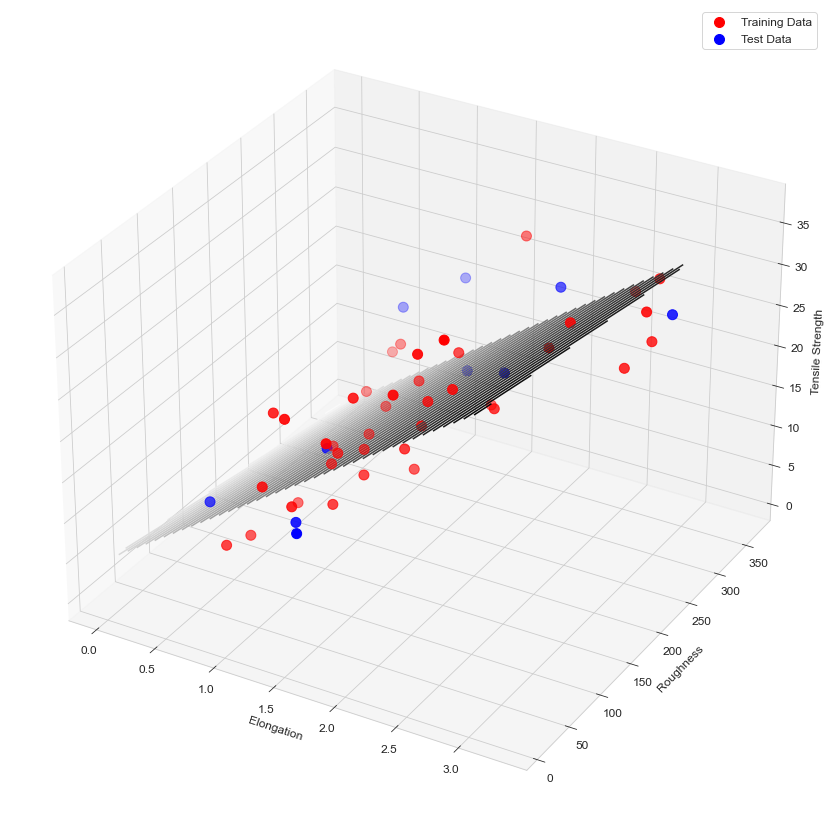

In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.rc('font',size=12)

xt =x_trainm[:,0]
yt =x_trainm[:,1]
zt =y_trainm[:,0]

ax.scatter(xt, yt, zt, c='r', marker='o',s=100, label='Training Data')

xs =x_testm[:,0]
ys =x_testm[:,1]
zs =y_testm[:,0]

ax.scatter(xs, ys, zs, c='b', marker='o',s=100, label='Test Data')

xsrf = np.linspace(0, 3, 50)
ysrf = np.linspace(10,350, 50)
X, Y = np.meshgrid(xsrf, ysrf)
Z = w0m+w1m*X+w2m*Y
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.set_xlabel('Elongation')
ax.set_ylabel('Roughness')
ax.set_zlabel('Tensile Strength')

plt.legend()
plt.show()
